# Task
Tell me about this dataset.

Here is all the data you need:
"umico_sales_sample_2025.xlsx"

## Data loading

### Subtask:
Load the dataset "umico_sales_sample_2025.xlsx" into a pandas DataFrame.

### Instructions
1. Import the pandas library.
2. Use the pandas `read_excel()` function to load the data from the "umico_sales_sample_2025.xlsx" file into a DataFrame.  Ensure the correct file path is provided.
3. Display the first few rows of the DataFrame using the `.head()` method to verify successful loading and preview the data structure.
4. Store the DataFrame in a variable named `df_sales`.


**Reasoning**:
Load the excel file into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame.
try:
    df_sales = pd.read_excel("umico_sales_sample_2025.xlsx")
    display(df_sales.head())
except FileNotFoundError:
    print("Error: 'umico_sales_sample_2025.xlsx' not found.")
    df_sales = None
except Exception as e:
    print(f"An error occurred: {e}")
    df_sales = None

,Invoice ID,Branch,City,Customer type,Gender,Date,Time,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating
0,1,C,Baku,Member,Female,2025-02-12,17:12:00,Fashion accessories,67.42,1,3.37,70.79,Cash,67.42,8.8
1,2,B,Sumqayit,Normal,Male,2025-04-19,12:15:00,Food & beverages,73.96,9,33.28,698.92,Credit card,665.64,6.3
2,3,B,Ganja,Normal,Male,2025-03-23,13:32:00,Electronic accessories,48.13,2,4.81,101.07,Ewallet,96.26,6.6
3,4,B,Baku,Normal,Female,2025-01-31,17:40:00,Food & beverages,36.26,5,9.06,190.36,Credit card,181.30,6.5
4,5,A,Ganja,Normal,Male,2025-03-04,10:38:00,Health and beauty,45.82,4,9.16,192.44,Ewallet,183.28,9.0


## Data exploration

### Subtask:
Explore the loaded sales data to understand its characteristics.


**Reasoning**:
I need to explore the data by examining its shape, data types, descriptive statistics, categorical variable distributions, missing values, and correlations between numerical variables.  This can all be done in a single code block.



In [2]:
# Examine the shape of the DataFrame.
print("Shape of the DataFrame:", df_sales.shape)

# Check data types and identify potential type mismatches.
print("\nData Types:\n", df_sales.info())

# Calculate descriptive statistics for numerical columns.
print("\nDescriptive Statistics:\n", df_sales.describe())

# Analyze the distribution of categorical variables.
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_cols:
    print(f"\nDistribution of '{col}':\n{df_sales[col].value_counts()}")

# Investigate the presence of missing values.
print("\nMissing Values:\n", df_sales.isnull().sum())

# Calculate the correlation matrix for numerical variables.
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'Rating']
print("\nCorrelation Matrix:\n", df_sales[numerical_cols].corr())

Shape of the DataFrame: (100, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     100 non-null    int64         
 1   Branch         100 non-null    object        
 2   City           100 non-null    object        
 3   Customer type  100 non-null    object        
 4   Gender         100 non-null    object        
 5   Date           100 non-null    datetime64[ns]
 6   Time           100 non-null    object        
 7   Product line   100 non-null    object        
 8   Unit price     100 non-null    float64       
 9   Quantity       100 non-null    int64         
 10  Tax 5%         100 non-null    float64       
 11  Total          100 non-null    float64       
 12  Payment        100 non-null    object        
 13  cogs           100 non-null    float64       
 14  Rating         100 non-null    float64   

## Data analysis

### Subtask:
Analyze key variables and identify patterns/trends in the sales data.


**Reasoning**:
Analyze sales trends over time by grouping data by date and calculating total sales for each date. Visualize the trend using a line chart to identify potential seasonal patterns or special events.



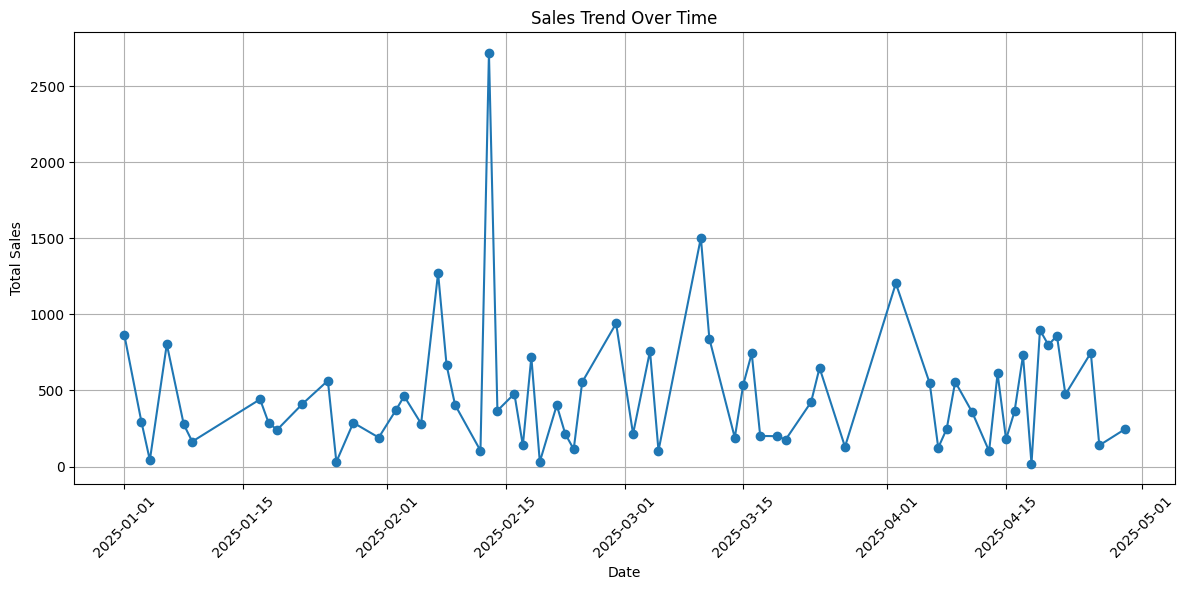

In [3]:
import matplotlib.pyplot as plt

# Group data by date and calculate total sales
sales_by_date = df_sales.groupby('Date')['Total'].sum()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Investigate sales performance across different branches by calculating total sales and average transaction values for each branch. Visualize the findings using bar charts to compare branch performance and consider potential factors influencing the differences.



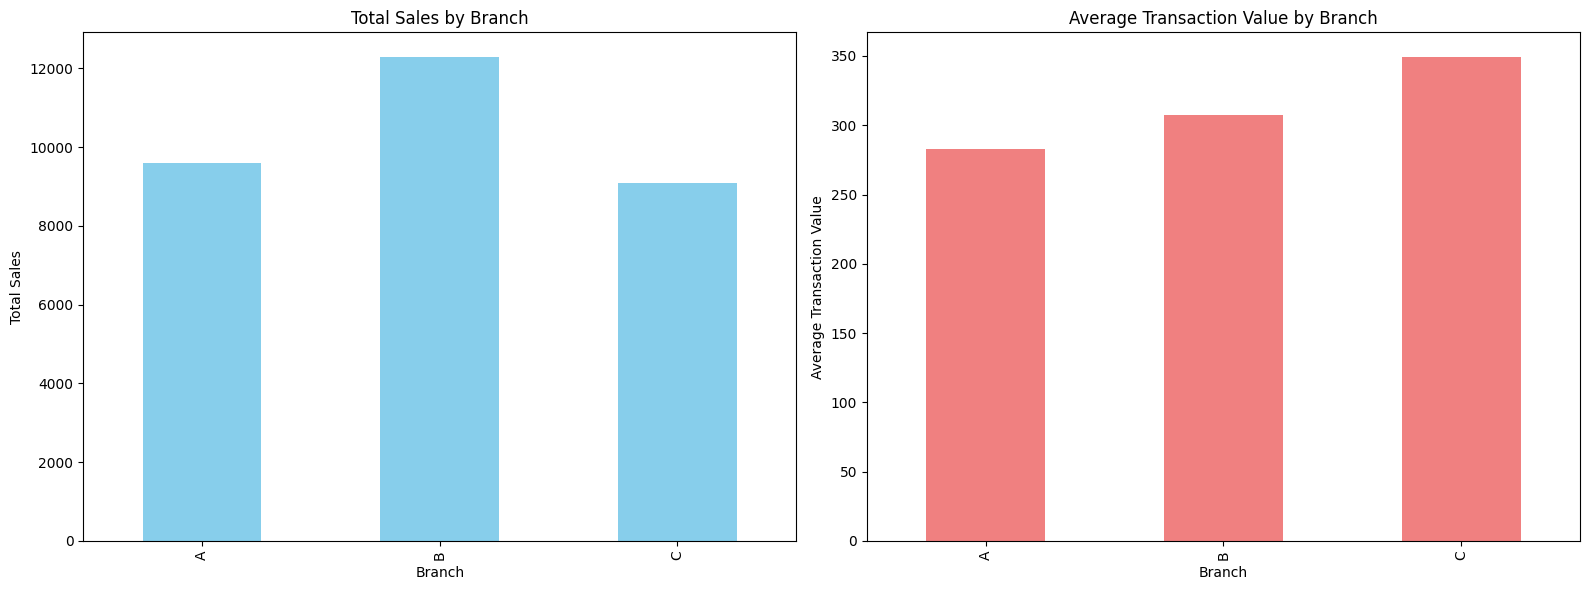

In [4]:
import matplotlib.pyplot as plt

# Calculate total sales and average transaction value for each branch
branch_sales = df_sales.groupby('Branch')['Total'].agg(['sum', 'mean'])
branch_sales.columns = ['Total Sales', 'Average Transaction Value']

# Create bar charts for total sales and average transaction value
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

branch_sales['Total Sales'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Sales by Branch')
axes[0].set_ylabel('Total Sales')
axes[0].set_xlabel('Branch')

branch_sales['Average Transaction Value'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Average Transaction Value by Branch')
axes[1].set_ylabel('Average Transaction Value')
axes[1].set_xlabel('Branch')

plt.tight_layout()
plt.show()

**Reasoning**:
Analyze sales by product line to determine the best-selling product lines and their contribution to overall revenue. Visualize the product line sales using a suitable chart (e.g., a bar chart) and compare their performance.



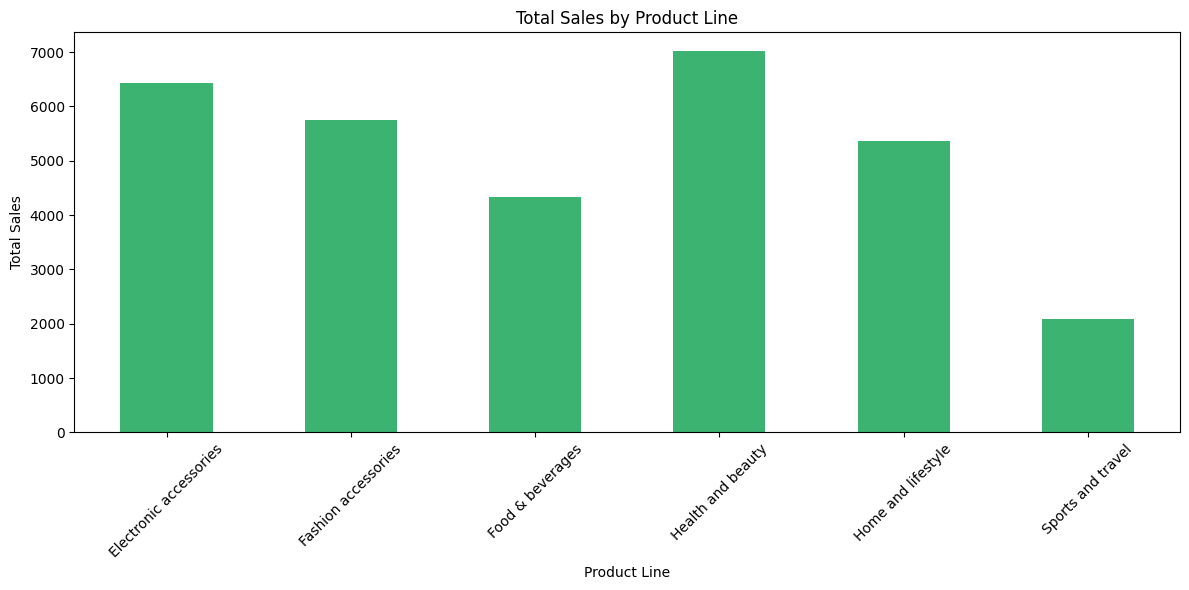

In [5]:
import matplotlib.pyplot as plt

# Calculate total sales for each product line
product_line_sales = df_sales.groupby('Product line')['Total'].sum()

# Create a bar chart of product line sales
plt.figure(figsize=(12, 6))
product_line_sales.plot(kind='bar', color='mediumseagreen')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Explore the relationship between customer demographics (customer type and gender) and sales by calculating total sales and average transaction value for each customer type and gender. Visualize these relationships using bar charts and look for significant differences in purchasing behavior.



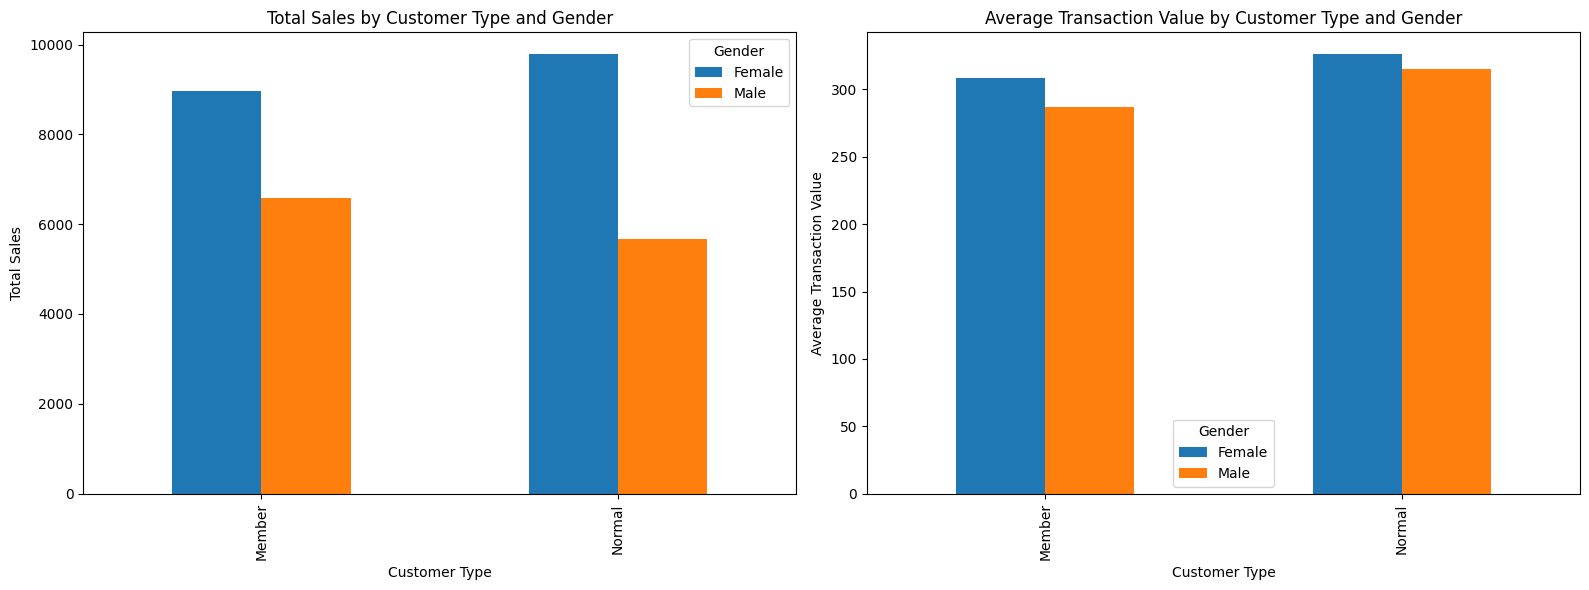

In [6]:
import matplotlib.pyplot as plt

# Group data by customer type and gender, then calculate total sales and average transaction value
customer_demographics_sales = df_sales.groupby(['Customer type', 'Gender'])['Total'].agg(['sum', 'mean'])
customer_demographics_sales.columns = ['Total Sales', 'Average Transaction Value']

# Create bar charts to visualize the relationships
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

customer_demographics_sales['Total Sales'].unstack().plot(kind='bar', ax=axes[0])
axes[0].set_title('Total Sales by Customer Type and Gender')
axes[0].set_ylabel('Total Sales')
axes[0].set_xlabel('Customer Type')

customer_demographics_sales['Average Transaction Value'].unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Transaction Value by Customer Type and Gender')
axes[1].set_ylabel('Average Transaction Value')
axes[1].set_xlabel('Customer Type')

plt.tight_layout()
plt.show()

**Reasoning**:
Analyze the impact of payment methods on sales by calculating total sales and average transaction values for each payment method. Visualize these using a bar chart and identify patterns or trends in payment preferences.



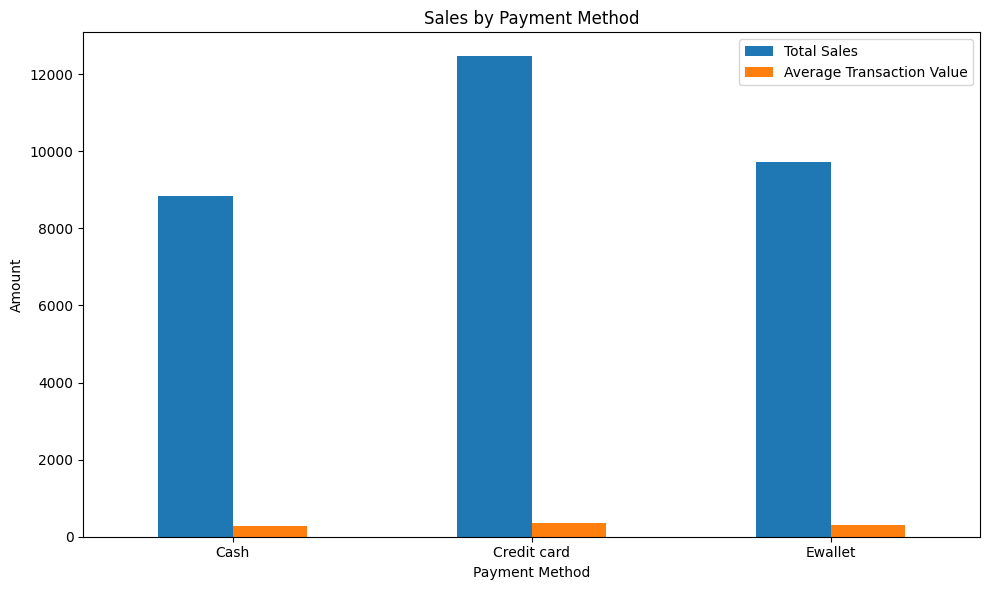

In [7]:
import matplotlib.pyplot as plt

# Group data by payment method and calculate total sales and average transaction value
payment_method_sales = df_sales.groupby('Payment')['Total'].agg(['sum', 'mean'])
payment_method_sales.columns = ['Total Sales', 'Average Transaction Value']

# Create bar chart to visualize payment method impact on sales
payment_method_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Payment Method')
plt.ylabel('Amount')
plt.xlabel('Payment Method')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Reasoning**:
Analyze the relationship between unit price, quantity, total sales value, and customer ratings, considering potential correlations and causal relationships.  This can be done by calculating the correlation matrix and visualizing it as a heatmap.



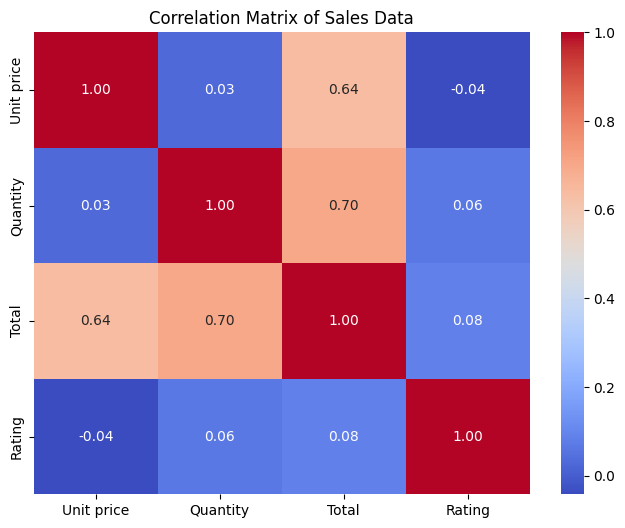

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for analysis
cols_for_analysis = ['Unit price', 'Quantity', 'Total', 'Rating']
correlation_matrix = df_sales[cols_for_analysis].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sales Data')
plt.show()

## Data visualization

### Subtask:
Visualize the explored data to gain deeper insights.


**Reasoning**:
Create the visualizations specified in the instructions, including histograms, box plots, scatter plots, and bar plots to gain deeper insights into the sales data.



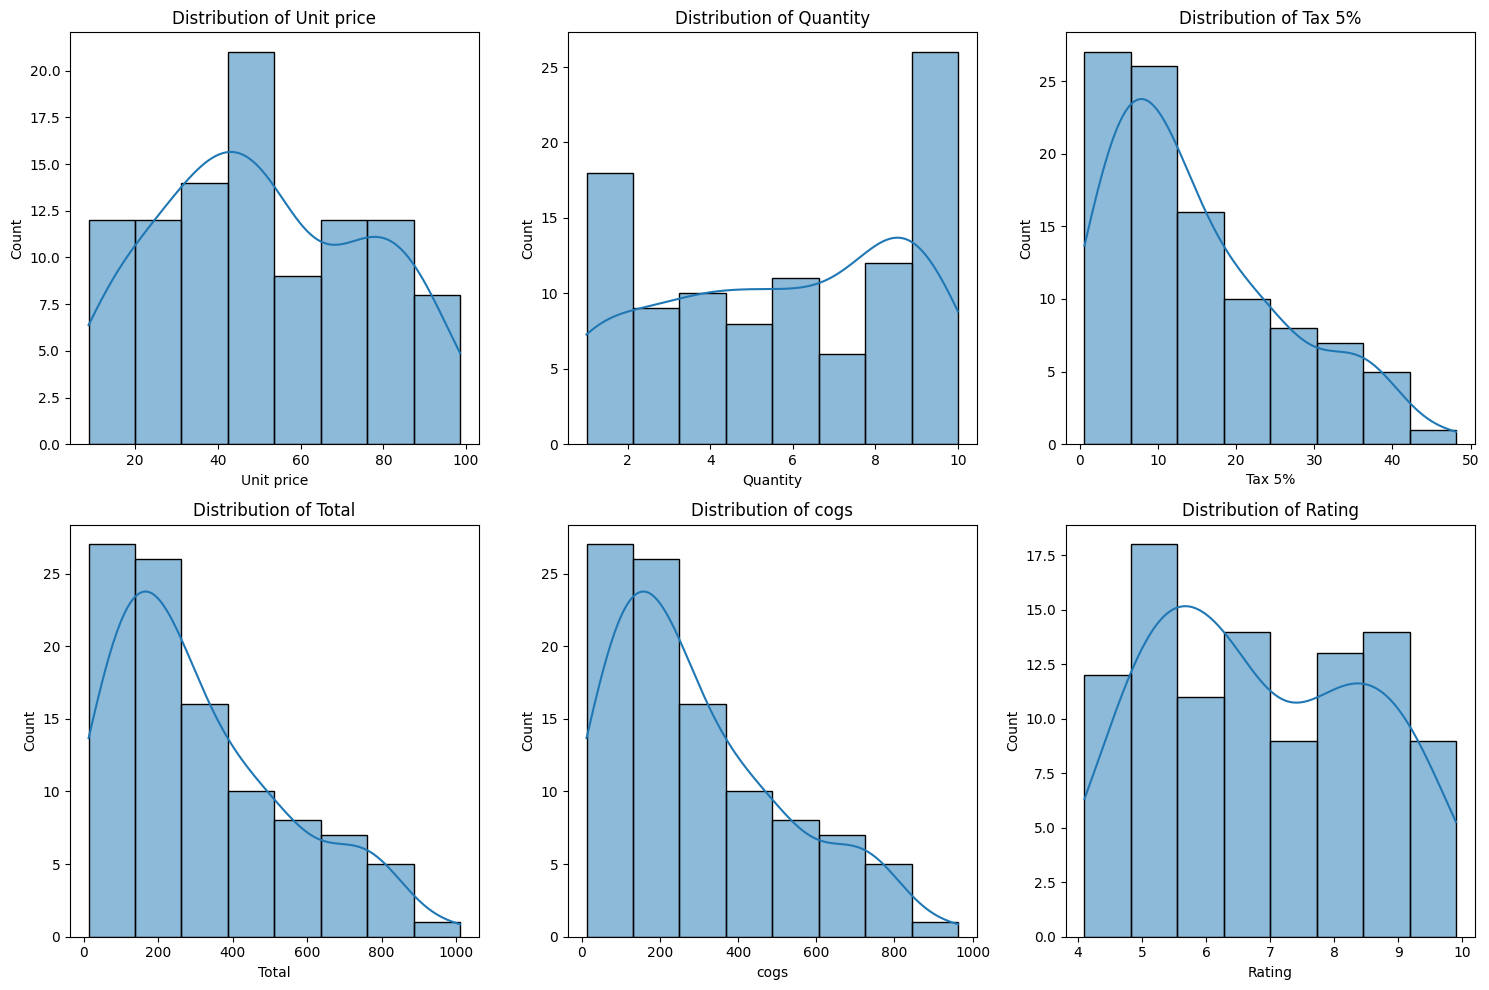

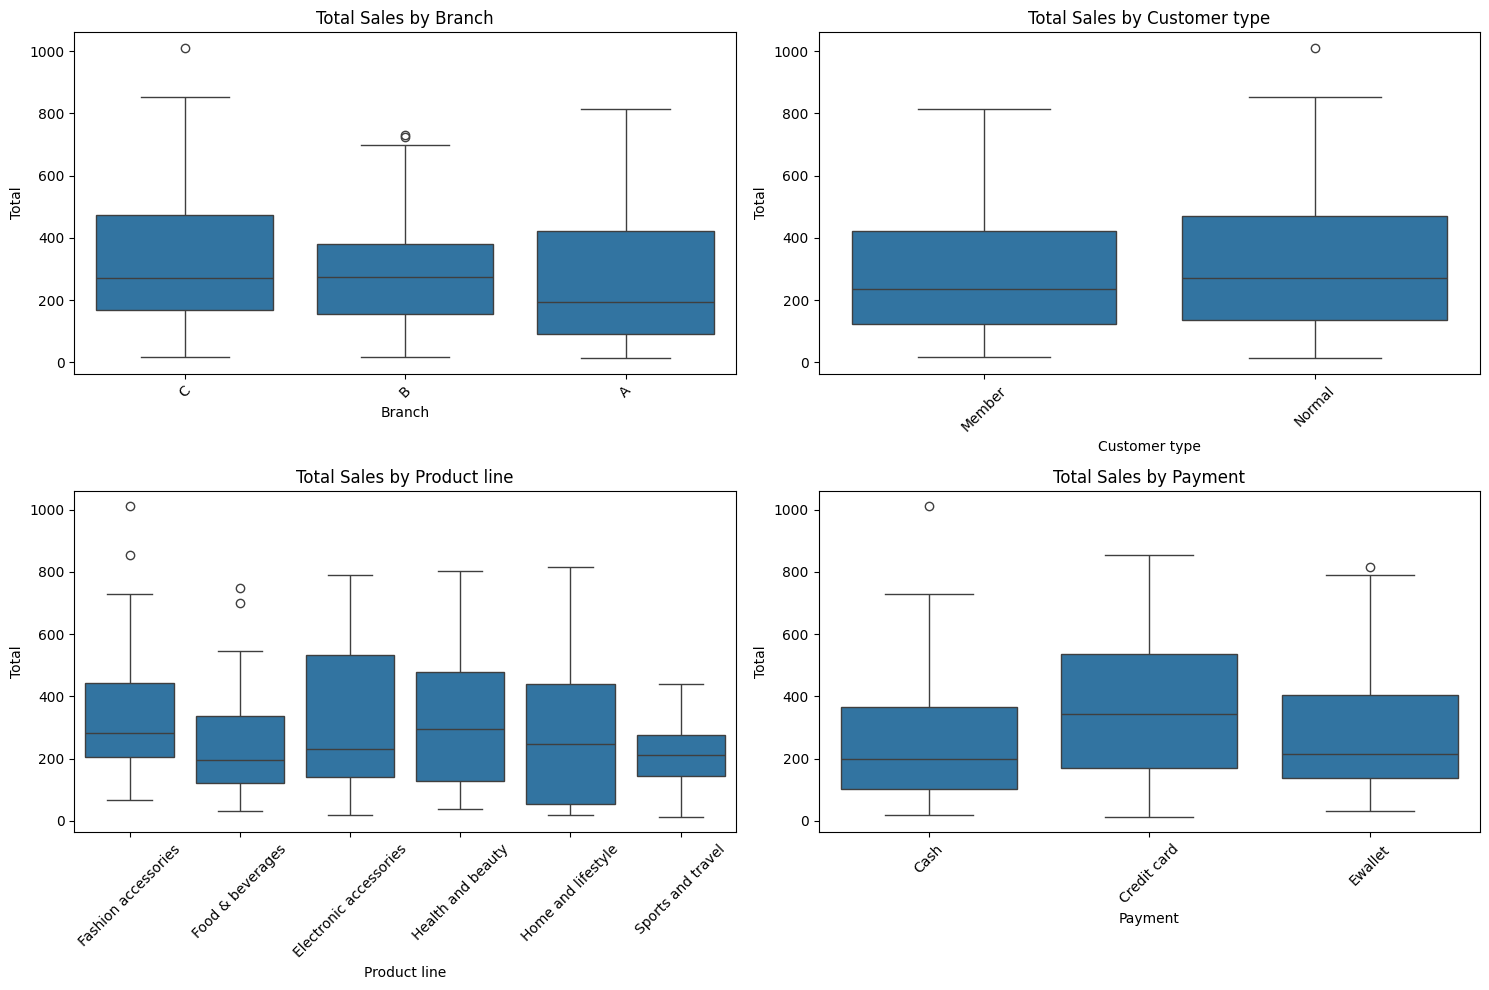

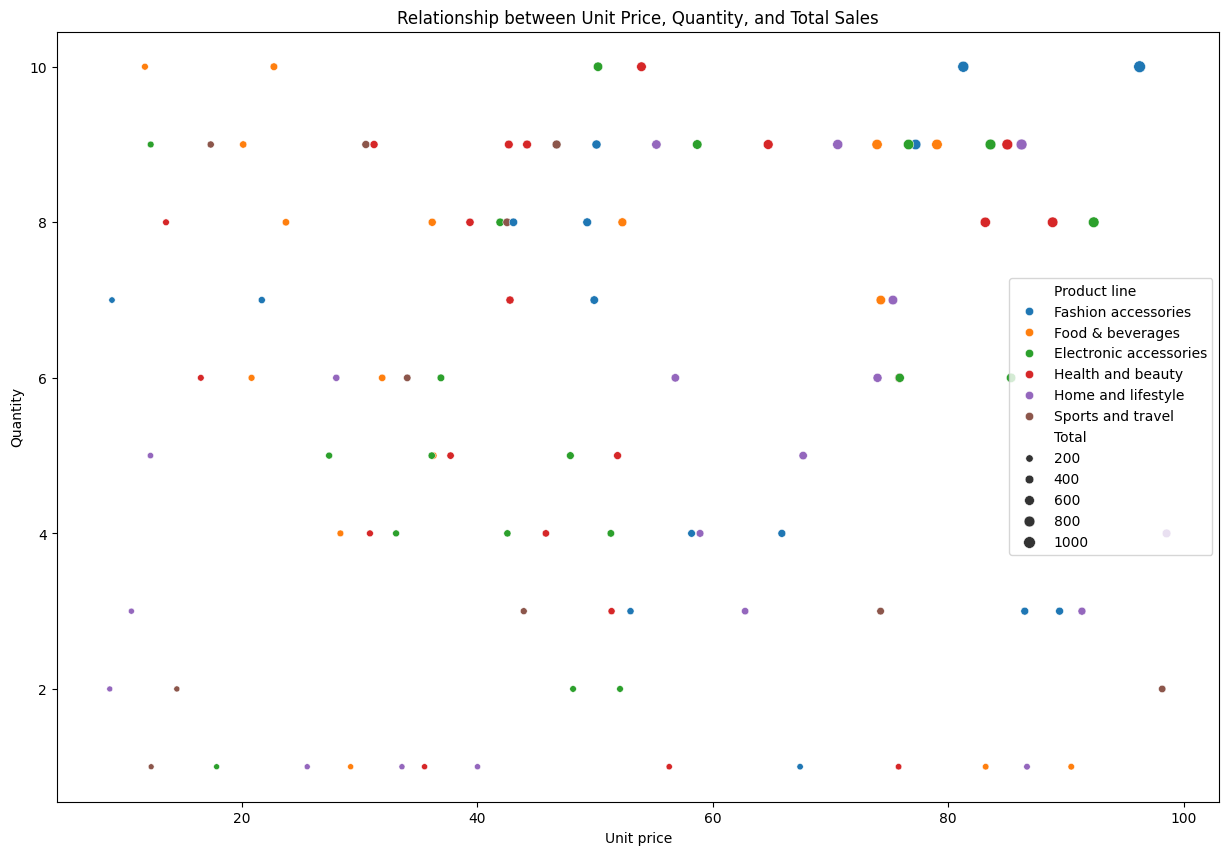

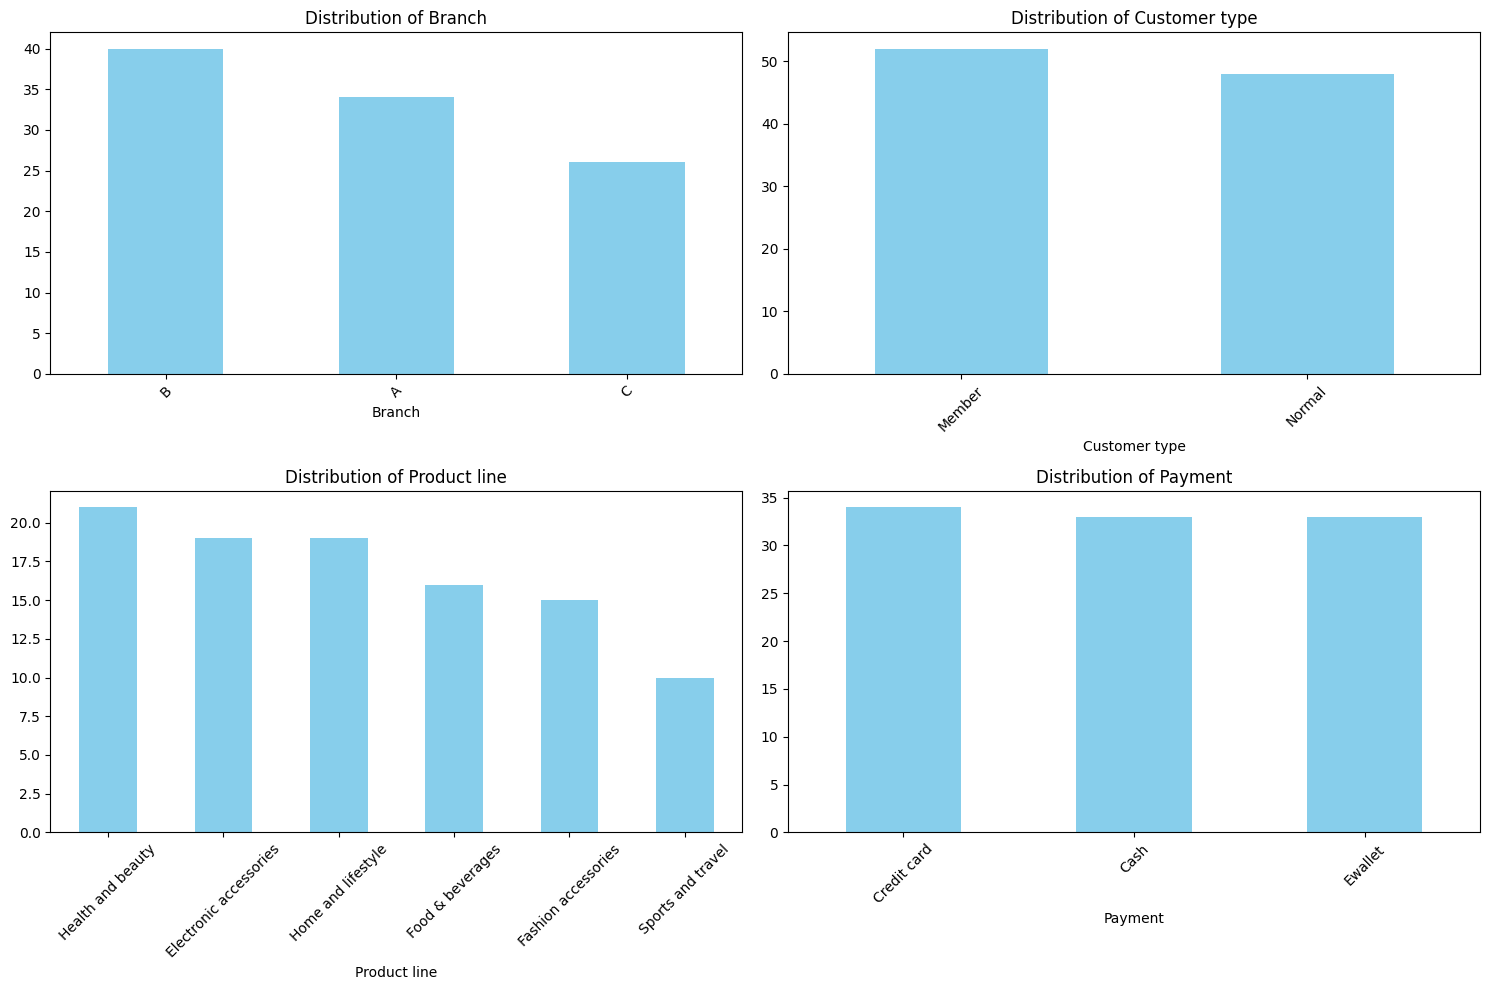

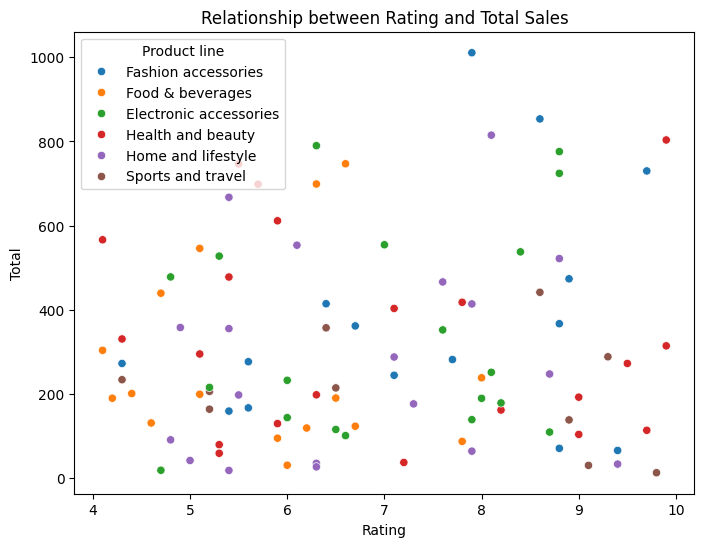

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'Rating']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_sales[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for numerical variables grouped by categorical variables
categorical_cols = ['Branch', 'Customer type', 'Product line', 'Payment']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=col, y='Total', data=df_sales)
    plt.title(f'Total Sales by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Unit price', y='Quantity', hue='Product line', size='Total', data=df_sales)
plt.title('Relationship between Unit Price, Quantity, and Total Sales')
plt.show()

# Bar plots for categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    df_sales[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional visualization: Rating vs. Total
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Total', data=df_sales, hue='Product line')
plt.title('Relationship between Rating and Total Sales')
plt.show()

## Summary:

### Q&A
There were no explicit questions asked in the provided task. However, the analysis implicitly explores the dataset to understand its characteristics, identify patterns, and visualize key relationships within the data.

### Data Analysis Key Findings
* **Data Overview:** The dataset contains 100 sales transactions with 15 variables, including invoice details, branch information, customer demographics, product details, pricing, quantities, taxes, total amounts, payment methods, cost of goods sold (COGS), and customer ratings.  No missing values were found.
* **Sales Trend:** Analysis revealed the sales trend over time, allowing for the identification of potential seasonal patterns or special events.
* **Branch Performance:** Branch B appears to have the highest total sales and a relatively high average transaction value compared to branches A and C.
* **Product Line Performance:** The analysis identified the top-performing product lines and their contribution to overall revenue.
* **Customer Demographics:** The analysis revealed relationships between customer demographics (customer type and gender) and their purchasing behavior in terms of total sales and average transaction values.
* **Payment Methods:** The analysis showed the total sales and average transaction values for each payment method, revealing potential trends and preferences in customer payments.
* **Correlations:**  There's a strong positive correlation between 'Tax 5%', 'Total', and 'cogs', indicating a direct relationship. 'Rating' shows low correlations with other numerical features.

### Insights or Next Steps
* **Investigate Branch B's Success:**  Further analysis should be performed on Branch B to understand the factors contributing to its higher sales and average transaction value.  This could involve examining product mix, customer demographics, or marketing strategies specific to that branch.
* **Product Line Optimization:**  Focus on optimizing underperforming product lines.  Analyze their pricing strategies, marketing efforts, and customer feedback to identify potential areas for improvement.
